In [1]:
pip freeze > model_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
data_mm_train_df = pd.read_csv('data_smin_mm_train_csv')
data_mm_test_df = pd.read_csv('data_mm_test_csv')
data_mm_val_df = pd.read_csv('data_mm_val_csv')

In [4]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

In [5]:
data_log_train_df = pd.read_csv('data_smin_log_train_csv')
data_log_test_df = pd.read_csv('data_test_csv')
data_log_val_df = pd.read_csv('data_val_csv')

In [6]:
print(f"Data_train: {data_mm_train_df.shape}")
print(f"Data_test: {data_mm_test_df.shape}")
print(f"Data_val: {data_mm_val_df.shape}")

#Divide by 10 for the sample

Data_train: (288041, 10)
Data_test: (27022, 10)
Data_val: (54045, 10)


In [7]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [8]:
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)

In [9]:
X_mm_train_sample, X_mm_test_sample, X_mm_val_sample, y_mm_train_sample, y_mm_test_sample, y_mm_val_sample = data_format(data_mm_train_df, data_mm_test_df, data_mm_val_df, 'sample', 20)
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)
X_log_train_sample, X_log_test_sample, X_log_val_sample, y_log_train_sample, y_log_test_sample, y_log_val_sample = data_format(data_log_train_df, data_log_test_df, data_log_val_df, 'sample', 20)

In [10]:
X_mm_train_sample.shape

(14402, 8)

In [11]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None, None)

SVM model

In [12]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [13]:
adfasdf

NameError: name 'adfasdf' is not defined

Baseline one SVC

Training score: 0.5584641022080267, Testing score: 0.6047372316802369


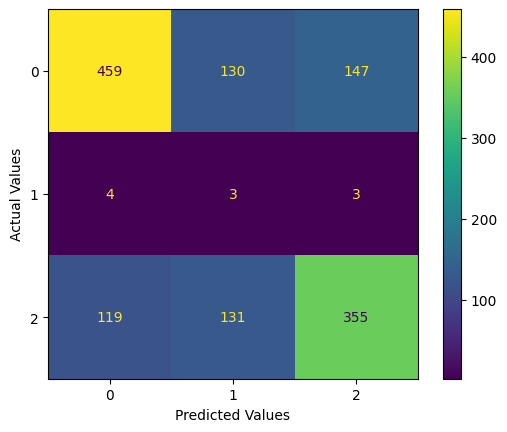

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       736
           1       0.01      0.30      0.02        10
           2       0.70      0.59      0.64       605

    accuracy                           0.60      1351
   macro avg       0.50      0.50      0.45      1351
weighted avg       0.74      0.60      0.67      1351



In [14]:
##SS and SMOTE data
model = SVC(kernel="linear", random_state=7)
model.fit(X_ss_train_sample, y_ss_train_sample)

model_train_score = model.score(X_ss_train_sample, y_ss_train_sample)
model_test_score = model.score(X_ss_test_sample, y_ss_test_sample)
print(f"Training score: {model_train_score}, Testing score: {model_test_score}" )

y_pred = model.predict(X_ss_test_sample)

cm = confusion_matrix(y_ss_test_sample, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0', '1', '2'])

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_test_sample, y_pred))

Training score: 0.5525621441466463, Testing score: 0.6069578090303479


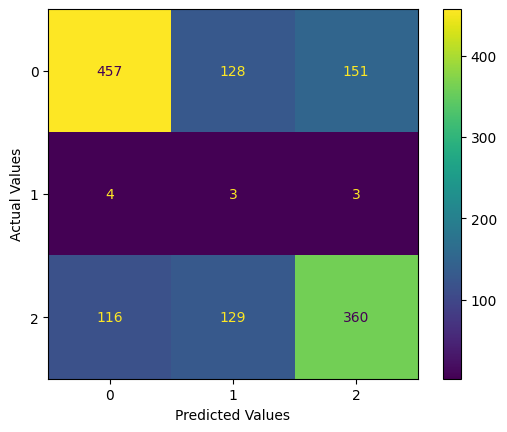

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       736
           1       0.01      0.30      0.02        10
           2       0.70      0.60      0.64       605

    accuracy                           0.61      1351
   macro avg       0.50      0.51      0.45      1351
weighted avg       0.75      0.61      0.67      1351



In [15]:
##MM and SMOTE data
model = SVC(kernel="linear", random_state=7)
model.fit(X_mm_train_sample, y_mm_train_sample)

model_train_score = model.score(X_mm_train_sample, y_mm_train_sample)
model_test_score = model.score(X_mm_test_sample, y_mm_test_sample)
print(f"Training score: {model_train_score}, Testing score: {model_test_score}" )

y_pred = model.predict(X_mm_test_sample)

cm = confusion_matrix(y_mm_test_sample, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0', '1', '2'])

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_mm_test_sample, y_pred))

In [18]:
X_log_test_sample.shape

(1351, 8)

In [16]:
#Log and SMOTE data
model = SVC(kernel="linear", random_state=7)
model.fit(X_log_train_sample, y_log_train_sample)

model_train_score = model.score(X_log_train_sample, y_log_train_sample)
model_test_score = model.score(X_log_train_sample, y_log_test_sample)
print(f"Training score: {model_train_score}, Testing score: {model_test_score}" )

y_pred = model.predict(X_log_test_sample)

cm = confusion_matrix(y_log_test_sample, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0', '1', '2'])

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_log_test_sample, y_pred))

Seems to have slight underfitting, and data unlikely to be linearly separable

In [ ]:
sdgdfg

How do we choose whether MinMax, SS or Log is best?

In [23]:
k_list = ['linear', 'rbf', 'sigmoid']
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100,200, 300]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300]

In [24]:
print("MinMax")
best_accuracy = 0

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:
        # for each combination of parameters, train an SVC
                
            model = SVC(kernel=k, gamma=gamma, C=c, random_state = 7)
            model.fit(X_mm_train_sample, y_mm_train_sample)
            y_mm_pred = model.predict(X_mm_val_sample)
            accuracy = accuracy_score(y_mm_val_sample, y_mm_pred)
            print(f"{k}, Gamma: {gamma}, C: {c}, Accuracy: {accuracy}")

        # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

MinMax
linear, Gamma: 0.001, C: 0.001, Accuracy: 0.02220577350111029
linear, Gamma: 0.001, C: 0.01, Accuracy: 0.6058475203552923
linear, Gamma: 0.001, C: 0.1, Accuracy: 0.6099185788304959
linear, Gamma: 0.001, C: 1, Accuracy: 0.5895632864544782
linear, Gamma: 0.001, C: 10, Accuracy: 0.5847520355292376
linear, Gamma: 0.001, C: 100, Accuracy: 0.5780903034789046
linear, Gamma: 0.001, C: 200, Accuracy: 0.5740192450037009
linear, Gamma: 0.001, C: 300, Accuracy: 0.572538860103627
linear, Gamma: 0.01, C: 0.001, Accuracy: 0.02220577350111029
linear, Gamma: 0.01, C: 0.01, Accuracy: 0.6058475203552923
linear, Gamma: 0.01, C: 0.1, Accuracy: 0.6099185788304959
linear, Gamma: 0.01, C: 1, Accuracy: 0.5895632864544782


KeyboardInterrupt: 

In [ ]:
print("SS")
best_accuracy = 0

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:
        # for each combination of parameters, train an SVC
                
            model = SVC(kernel=k, gamma=gamma, C=c, random_state = 7)
            model.fit(X_ss_train_sample, y_ss_train_sample)
            y_ss_pred = model.predict(X_ss_val_sample)
            accuracy = accuracy_score(y_ss_val_sample, y_ss_pred)
            print(f"{k}, Gamma: {gamma}, C: {c}, Accuracy: {accuracy}")

        # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

SS
linear, Gamma: 0.001, C: 0.001, Accuracy: 0.7261287934863064
linear, Gamma: 0.001, C: 0.01, Accuracy: 0.7276091783863805
linear, Gamma: 0.001, C: 0.1, Accuracy: 0.7264988897113249
linear, Gamma: 0.001, C: 1, Accuracy: 0.7283493708364175
linear, Gamma: 0.001, C: 10, Accuracy: 0.7276091783863805


In [ ]:
kgkjjk

In [ ]:
print("LogNorm")
best_accuracy = 0

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:
        # for each combination of parameters, train an SVC
                
            model = SVC(kernel=k, gamma=gamma, C=c, random_state = 7)
            model.fit(X_log_train_sample, y_log_train_sample)
            y_log_pred = model.predict(X_log_val_sample)
            accuracy = accuracy_score(y_log_val_sample, y_log_pred)
            print(f"{k}, Gamma: {gamma}, C: {c}, Accuracy: {accuracy}")

        # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

In [ ]:
gkhjhk

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Define the SVM base classifier
svm_classifier = SVC()

# Create the bagging classifier with SVM as the base estimator
bagging_classifier = BaggingClassifier(estimator=svm_classifier, random_state=7)

# Use the best parameters to create the final bagging classifier
final_bagging_classifier = BaggingClassifier(estimator=SVC(C=10, gamma=10, kernel='rbf', random_state=7), 
                                             n_estimators=100,
                                             random_state=7)

# Train the final bagging classifier on the training data
final_bagging_classifier.fit(X_ss_train_sample, y_ss_train_sample)

# Evaluate the classifier on the validation set
val_predictions = final_bagging_classifier.predict(X_ss_val_sample)
val_accuracy = accuracy_score(y_ss_val_sample, val_predictions)
print("Validation Accuracy:", val_accuracy)



# Evaluate the classifier on the test set
#test_predictions = final_bagging_classifier.predict(X_test)
#test_accuracy = accuracy_score(y_test, test_predictions)
#print("Test Accuracy:", test_accuracy)


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Define the SVM base classifier
svm_classifier = SVC()

# Create the bagging classifier with SVM as the base estimator
bagging_classifier = BaggingClassifier(estimator=svm_classifier, random_state=7)

# Use the best parameters to create the final bagging classifier
final_bagging_classifier = BaggingClassifier(estimator=SVC(C=10, gamma=10, kernel='rbf', random_state=7), 
                                             n_estimators=50,
                                             random_state=7)

# Train the final bagging classifier on the training data
final_bagging_classifier.fit(X_ss_train_sample, y_ss_train_sample)

# Evaluate the classifier on the validation set
val_predictions = final_bagging_classifier.predict(X_ss_val_sample)
val_accuracy = accuracy_score(y_ss_val_sample, val_predictions)
print("Validation Accuracy:", val_accuracy)



# Evaluate the classifier on the test set
#test_predictions = final_bagging_classifier.predict(X_test)
#test_accuracy = accuracy_score(y_test, test_predictions)
#print("Test Accuracy:", test_accuracy)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Define the SVM base classifier
svm_classifier = SVC()

# Define the parameters to tune (you can customize this based on your needs)
param_grid = {
    'base_estimator__C': [0.1, 1, 10],
    'base_estimator__kernel': ['linear', 'rbf', 'poly'],
    'base_estimator__gamma': ['scale', 'auto'],
    'n_estimators': [10, 50, 100],
}

# Create the bagging classifier with SVM as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=svm_classifier, random_state=42)

# Create the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_ss_train_sample, y_ss_train_sample)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final bagging classifier
final_bagging_classifier = BaggingClassifier(base_estimator=SVC(**best_params['base_estimator']), 
                                             n_estimators=best_params['n_estimators'],
                                             random_state=42)

# Train the final bagging classifier on the training data
final_bagging_classifier.fit(X_ss_train_sample, y_ss_train_sample)

# Evaluate the classifier on the validation set
val_predictions = final_bagging_classifier.predict(X_ss_val_sample)
val_accuracy = accuracy_score(y_ss_val_sample, val_predictions)
print("Validation Accuracy:", val_accuracy)



# Evaluate the classifier on the test set
#test_predictions = final_bagging_classifier.predict(X_test)
#test_accuracy = accuracy_score(y_test, test_predictions)
#print("Test Accuracy:", test_accuracy)


https://datascience.stackexchange.com/questions/66216/gridsearch-without-cv

Autoencoder

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

In [ ]:
k_list = ['linear', 'rbf', 'sigmoid']
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100,200, 300]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300]

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the architecture of the autoencoder
input_dim = X_ss_train_sample.shape[1]
encoding_dim = 10  # You can adjust this based on your preference

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the autoencoder
autoencoder.fit(X_ss_train_sample, X_ss_train_sample, epochs=50, batch_size=32, shuffle=True, validation_data=(X_ss_test_sample, X_ss_test_sample))

# Extract features using the encoder part of the autoencoder
encoder = Model(input_layer, encoded)
encoded_features_train = encoder.predict(X_ss_train_sample)
encoded_features_test = encoder.predict(X_ss_test_sample)

best_accuracy = 0
# Now use SVM as the classifier
for k in k_list:
    for c in c_list:
        for g in gamma_list:
            svm_classifier = SVC(C=c, gamma=g, kernel=k, random_state=7)  # You can adjust the kernel and C parameter based on your preference
            svm_classifier.fit(encoded_features_train, y_ss_train_sample)

            # Predict on the test set
            svm_predictions = svm_classifier.predict(encoded_features_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_ss_test_sample, svm_predictions)
            print(f'Kernel: {k}, C: {c}, Gamma: {g}, SVM Accuracy: {accuracy}')


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

In [ ]:
k_list = ['rbf']
gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
c_list = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the architecture of the autoencoder
input_dim = X_ss_train_sample.shape[1]
encoding_dim = 10  # You can adjust this based on your preference

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the autoencoder
autoencoder.fit(X_ss_train_sample, X_ss_train_sample, epochs=50, batch_size=32, shuffle=True, validation_data=(X_ss_test_sample, X_ss_test_sample))

# Extract features using the encoder part of the autoencoder
encoder = Model(input_layer, encoded)
encoded_features_train = encoder.predict(X_ss_train_sample)
encoded_features_test = encoder.predict(X_ss_test_sample)

best_accuracy = 0
# Now use SVM as the classifier
for k in k_list:
    for c in c_list:
        for g in gamma_list:
            svm_classifier = SVC(C=c, gamma=g, kernel=k, random_state=7)  # You can adjust the kernel and C parameter based on your preference
            svm_classifier.fit(encoded_features_train, y_ss_train_sample)

            # Predict on the test set
            svm_predictions = svm_classifier.predict(encoded_features_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_ss_test_sample, svm_predictions)
            print(f'Kernel: {k}, C: {c}, Gamma: {g}, SVM Accuracy: {accuracy}')


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': g, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\carth\AppData\Local\Temp\ipykernel_1396\438131127.py", line 25, in <module>

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,8] and labels shape [256]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2140]

In [ ]:
k_list = ['linear', 'rbf', 'sigmoid']
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100,200, 300]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300]

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from keras import regularizers
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the architecture of the autoencoder
input_dim = X_ss_train_sample.shape[1]
encoding_dim = 10  # You can adjust this based on your preference

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the autoencoder
autoencoder.fit(X_ss_train_sample, X_ss_train_sample, epochs=150, batch_size=32, shuffle=True, validation_data=(X_ss_test_sample, X_ss_test_sample))

# Extract features using the encoder part of the autoencoder
encoder = Model(input_layer, encoded)
encoded_features_train = encoder.predict(X_ss_train_sample)
encoded_features_test = encoder.predict(X_ss_test_sample)

best_accuracy = 0
# Now use SVM as the classifier
for k in k_list:
    for c in c_list:
        for g in gamma_list:
            svm_classifier = SVC(C=c, gamma=g, kernel=k, random_state=7)  # You can adjust the kernel and C parameter based on your preference
            svm_classifier.fit(encoded_features_train, y_ss_train_sample)

            # Predict on the test set
            svm_predictions = svm_classifier.predict(encoded_features_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_ss_test_sample, svm_predictions)
            print(f'Kernel: {k}, C: {c}, Gamma: {g}, SVM Accuracy: {accuracy}')


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': g, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

Autoencoder but with all 8 variables?
PCA instead of autoencoder?

In [ ]:
k_list = ['rbf']
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100,200, 300]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300]

In [ ]:
best_accuracy = 0

# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


for n in range(2,8):
# Perform PCA to reduce dimensionality
    #n_components = 2  # Number of principal components to keep
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_ss_train_sample)
    X_test_pca = pca.transform(X_ss_test_sample)

    for k in k_list:
        for c in c_list:
            for g in gamma_list:
                svm_classifier = SVC(C=c, gamma=g, kernel=k, random_state=7)  # You can adjust the kernel and C parameter based on your preference
                svm_classifier.fit(X_train_pca, y_ss_train_sample)

                y_pred = svm_classifier.predict(X_test_pca)

                accuracy = accuracy_score(y_ss_test_sample, y_pred)
                print(f'PCs: {n}, Kernel: {k}, C: {c}, Gamma: {g}, SVM Accuracy: {accuracy}')
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_parameters = {'PCs': n, 'C': c, 'gamma': g, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

In [ ]:
print("SS")
best_accuracy = 0

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:
        # for each combination of parameters, train an SVC
                
            model = SVC(kernel=k, gamma=gamma, C=c, random_state = 7)
            model.fit(X_ss_train_sample, y_ss_train_sample)
            y_ss_pred = model.predict(X_ss_val_sample)
            accuracy = accuracy_score(y_ss_val_sample, y_ss_pred)
            print(f"{k}, Gamma: {gamma}, C: {c}, Accuracy: {accuracy}")

        # if we got a better score, store the score and parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

Used SS scaled data, best parameters as chosen above and all of the features

In [ ]:
model= SVC(kernel="rbf", random_state=10, C=10, gamma=1)
model.fit(X_ss_train, y_ss_train)

y_train_pred = model.predict(X_ss_train)
y_val_pred = model.predict(X_ss_val)
y_test_pred = model.predict(X_ss_test)

# Model Accuracy: how often is the classifier correct?
print(f"Train Accuracy: {accuracy_score(y_ss_train, y_train_pred)}, Val Accuracy: {accuracy_score(y_ss_val, y_val_pred)}, Test Accuracy: {accuracy_score(y_ss_test, y_pred)}")